# Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data1 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s1_f175_i001.txt", names=["Timestamp", "Platform", "Rotary"])
#raw_data2 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s2_f150_i001.txt", names=["Timestamp", "Platform", "Rotary"])

In [3]:
raw_data1

,Timestamp,Platform,Rotary
0,0.000116,0,0
1,0.000202,0,0
2,0.000243,0,0
3,0.000264,0,0
4,0.000284,0,0
...,...,...,...
399995,7.627492,86772,112
399996,7.627511,86772,112
399997,7.627530,86772,112
399998,7.627549,86772,112


In [19]:
start1 = np.where([raw_data1['Timestamp']<3])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>7])
end1 = end1[1][0]


#start2 = np.where([raw_data2['Timestamp']<3])
#start2 = start2[1][-1]

#end2 = np.where([raw_data2['Timestamp']>7])
#end2 = end2[1][0]

In [44]:
start3 = np.where([raw_data1['Platform']<18000])
start3 = start3[1][-1]

end3 = np.where([raw_data1['Platform']>80000])
end3 = end3[1][0]

#start2 = np.where([raw_data2['Timestamp']<3])
#start2 = start2[1][-1]

#end2 = np.where([raw_data2['Timestamp']>7])
#end2 = end2[1][0]

119069

In [33]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

#sliced_data2 = raw_data2[start1+1:end1]
#sliced_data2

,Timestamp,Platform,Rotary
157254,3.000001,30751,93
157255,3.000020,30751,93
157256,3.000039,30752,93
157257,3.000058,30752,93
157258,3.000077,30752,93
...,...,...,...
367149,6.999917,78976,109
367150,6.999936,78977,109
367151,6.999955,78977,109
367152,6.999974,78977,109


In [34]:
sliced_data3 = raw_data1[start3:end3]
sliced_data3

#sliced_data2 = raw_data2[start1+1:end1]
#sliced_data2

,Timestamp,Platform,Rotary
119069,2.272540,17999,107
119070,2.272559,18000,107
119071,2.272578,18000,107
119072,2.272597,18001,107
119073,2.272616,18001,107
...,...,...,...
371614,7.084909,80000,106
371615,7.084928,80000,106
371616,7.084946,80000,106
371617,7.084965,80000,106


In [54]:
j = sliced_data1['Timestamp'][start1+1]
k = sliced_data3['Platform'][start3]

In [58]:
Timestamp1 = sliced_data1['Timestamp'] 
Platform_disp1 = sliced_data1['Platform']
Rotary_disp1 = sliced_data1['Rotary']*5-sliced_data1['Rotary'].mean()*5

Timestamp3 = sliced_data3['Timestamp']
Platform_disp3 = sliced_data3['Platform'] 
Rotary_disp3 = sliced_data3['Rotary']*5-sliced_data3['Rotary'].mean()*5

#Timestamp2 = sliced_data2['Timestamp']
#Platform_disp2 = sliced_data2['Platform']
#Rotary_disp2 = sliced_data2['Rotary']*5-sliced_data2['Rotary'].mean()*5

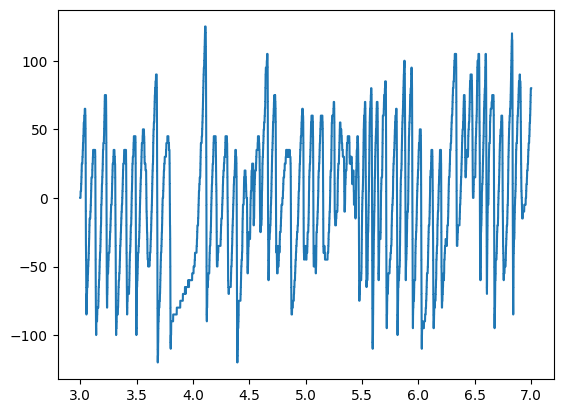

In [59]:
fig = plt.figure()
#axis = fig.add_axes("")
plt.plot(Timestamp1,Rotary_disp1)
#plt.plot(Platform_disp2,Rotary_disp2)

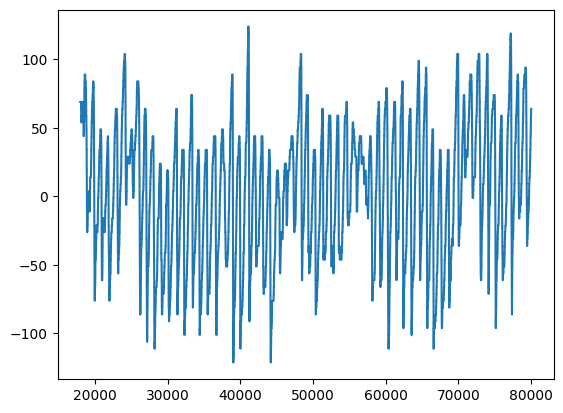

In [60]:
fig2 = plt.figure()
#axis = fig.add_axes("")
plt.plot(Platform_disp3,Rotary_disp3)
#plt.plot(Platform_disp2,Rotary_disp2)